# Sample Mean as a function of $n$

This notebook discusses the probability that a Sample Mean is within a certain distance of the true mean, as a Function of $n$

For better rendering of the equations, try viewing this notebook in NB viewer at:  https://nbviewer.jupyter.org/github/dpshenoy/R_examples/blob/master/SampleMean_as_fn_of_n.ipynb

Pretend we have a large collection of objects with some numerical property which we have reason to assume is normally distributed with mean $\mu$ and standard deviation $\sigma$.  That is, we have a random variable:

$$
X \sim N(\mu,\sigma)
$$

We plan to realize a random sample $X_1, X_2, ... X_n$ from this collection.  The *sample* mean $\bar{X}$ is the mean of these yet-to-be-realized $X_i$.  For a given $n$, what's the probability the *sample* mean $\bar{X}$ is within distance $d$ of the true mean $\mu$?  This matters because in reality there are  often practical limits to drawing very large samples.  So we want to quantify how close our sample mean is to the true mean $\mu$, especially for smaller $n$.  We compute the probability is that the sample mean $\bar{X}$ is within distance $d$ of the mean $\mu$:
$$P( (\mu - d) < X < (\mu + d) )$$ 

This will be a function of $n$.   When computing areas under the Gaussian distribution curve, R's function `pnorm()` has the option to supply a mean and standard deviation other than for standard normal (mean = 0, sd = 1).  I prefer working with the standard normal, so I change variables from $X$ to $Z$:

$$Z \equiv \frac{X-\mu_{\bar{X}}}{\sigma_{\bar{X}}}$$

For a random sample $X_1, X_2,...,X_n$ from any distribution with mean $\mu$ and standard deviation $\sigma$, the sample mean $\bar{X}$ follows its own distribution with a mean and standard deviation of, respectively:
$$\mu_{\bar{X}} = \mu; \hspace{24pt} \sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$$

So:
$$
\begin{eqnarray}
P( (\mu - d) < X < (\mu + d) ) & = & P \left( \frac{(\mu -d) - \mu_{\bar{X}}}{\sigma/\sqrt{n}} < \frac{X-\mu_{\bar{X}}}{\sigma_{\bar{X}}} < \frac{(\mu +d) - \mu_{\bar{X}}}{\sigma/\sqrt{n}} \right) \\
                 & = & P\left( \frac{-d\sqrt{n}}{\sigma} < Z < \frac{d\sqrt{n}}{\sigma} \right) \\
                 & = & P\left( Z < \frac{d\sqrt{n}}{\sigma} \right) - P\left( Z < \frac{-d\sqrt{n}}{\sigma} \right) \\
                 & = & \mbox{pnorm}\left( \frac{d\sqrt{n}}{\sigma} \right) - \mbox{pnorm}\left( \frac{-d\sqrt{n}}{\sigma} \right)
\end{eqnarray}
$$

It's common sense that for a chosen distance $d$ around the true mean $\mu$, a larger $n$ gets closer to the true mean.  Alternately, if we cannot increase $n$, we have to accept a limit on how likely the sample mean is within some desired distance $d$ of the true mean.  This is illustrated in the plot below.

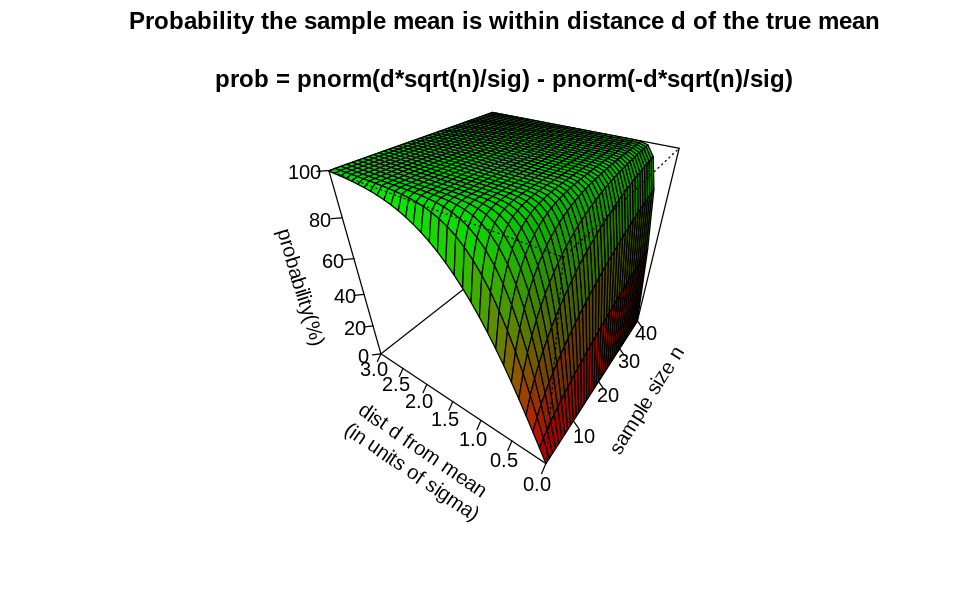

In [1]:
n <- 1:40
d <- seq(0,3,0.1)   # in units of sigma
f <- function(n,d){ 100.*( pnorm(d*sqrt(n)) - pnorm(-d*sqrt(n)) ) }
z <- outer(n,d,f)

#########################################################################
# color shading function courtesy of:
#    http://svitsrv25.epfl.ch/R-doc/library/graphics/html/persp.html
nrz <- nrow(z) ; ncz <- ncol(z)
# Create a function interpolating colors in the range of specified colors
jet.colors <- colorRampPalette( c("red", "green") ) 
# Generate the desired number of colors from this palette
nbcol <- 100
color <- jet.colors(nbcol)
# Compute the z-value at the facet centres
zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]
# Recode facet z-values into color indices
facetcol <- cut(zfacet, nbcol)
#########################################################################

options(repr.plot.width=8, repr.plot.height=5)

persp(n,d,z,theta=-55,phi=35,shade=0.25,axes=T,ticktype="detailed", col=color[facetcol],
         main="\nProbability the sample mean is within distance d of the true mean\n\nprob = pnorm(d*sqrt(n)/sig) - pnorm(-d*sqrt(n)/sig)\n",
         xlab="\n\nsample size n",ylab="\n\n\ndist d from mean \n(in units of sigma)", zlab="\n\nprobability(%)")

###  For example, we can ask: "What minimum sample size is required so that it is 95% likely the sample mean $\bar{X}$ is within $d = 1\sigma$ of the true mean?"  We proceed along the $d = 1$ curve until we reach a height of 95%.  That occurs by $n$ = 4. 
### Alternately, for a given sample size (e.g., $n$ = 8), it is about 99.5% likely the sample mean is within 1$\sigma$ of the true mean.  If you wanted that same 99.5% likelihood for being within just 0.5$\sigma$ of the true mean, you would need to increase the sample size to $n$ = 32.